In [1]:
import numpy as np
from scipy import stats
from scipy import optimize as opt  # 最適化ライブラリ
from scipy.stats import beta, uniform  # ベータ分布、一様分布
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")
np.random.seed(123)

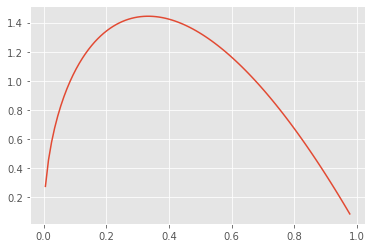

In [3]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b));

In [4]:
type(beta(a,b).pdf)

method

In [5]:
# #f = beta(a=a, b=b).pdf
# f = beta(a, b).pdf

# res = opt.fmin(lambda x: -f(x), 0.32)  #0.32あたりからはじめて最小化
# y_max = f(res)

In [6]:
f = beta(a=a, b=b).pdf

In [7]:
res = opt.fmin(lambda x: -f(x), 0.32)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 9
         Function evaluations: 18


In [9]:
res

array([0.3333125])

In [8]:
y_max = f(res)

In [10]:
y_max

array([1.44337567])

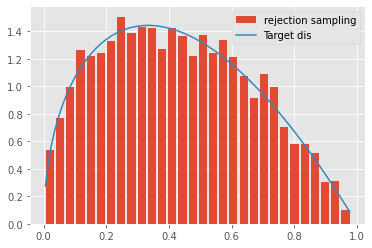

In [11]:
NMCS = 5000

x_mcs = uniform.rvs(size=NMCS)  # 横軸をきめる　5,000個のサンプリング

r = uniform.rvs(size=NMCS) * y_max  # 縦軸をきめる

accept = x_mcs[r <= f(x_mcs)]  # 判定して、範囲内のときのみ保存

#plt.hist(accept, normed=True, bins=30, rwidth=0.8, label="rejection sampling")
plt.hist(accept,  density=True, bins=30, rwidth=0.8, label="rejection sampling")

x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b), label = "Target dis")

plt.legend()

plt.show();

In [12]:
x_mcs

array([0.69646919, 0.28613933, 0.22685145, ..., 0.43162427, 0.94270979,
       0.04399307])

In [13]:
r.shape

(5000,)